# sheet 05
Leonard Benkendorff, Dorothea Schwärzel, Sebastian Preuß

In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300 # higher resolution figures
plt.rc('text', usetex=True) # use LaTeX in axis and plot titles

## 1 QDA
(a)

In [2]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: group the points into two arrays pts0, pts1 according to the labels
pts0 = pts[np.where(labels==0)]
pts1 = pts[np.where(labels==1)]
print('We have', pts.shape[0], 'points', pts0.shape[0], 'of which have label "0"')
# TODO: compute the mean and standard deviations for each class (and print them)
mean0 = np.mean(pts0)
std0 = np.std(pts0)
mean1 = np.mean(pts1)
std1 = np.std(pts1)

We have 320 points 170 of which have label "0"


(b)
To calculate the posterior $p(y=0|x)$, we use Bayes' rule:
\begin{align}
p(y=0|x) &= \frac{p(x|y=0)p(y=0)}{p(x)}\\
&=\frac{p(x|y=0)p(y=0)}{p(x|y=0)p(y=0)+p(x|y=1)p(y=1)}\\
&=\frac{p(x|y=0)p(y=0)}{p(x|y=0)p(y=0)+p(x|y=1)p(y=0)}\\
&=\frac{p(x|y=0)}{p(x|y=0)+p(x|y=1)},
\end{align}
where all the probabilities remaining in the last expression are taken to be the gaussians calculated in part (a).

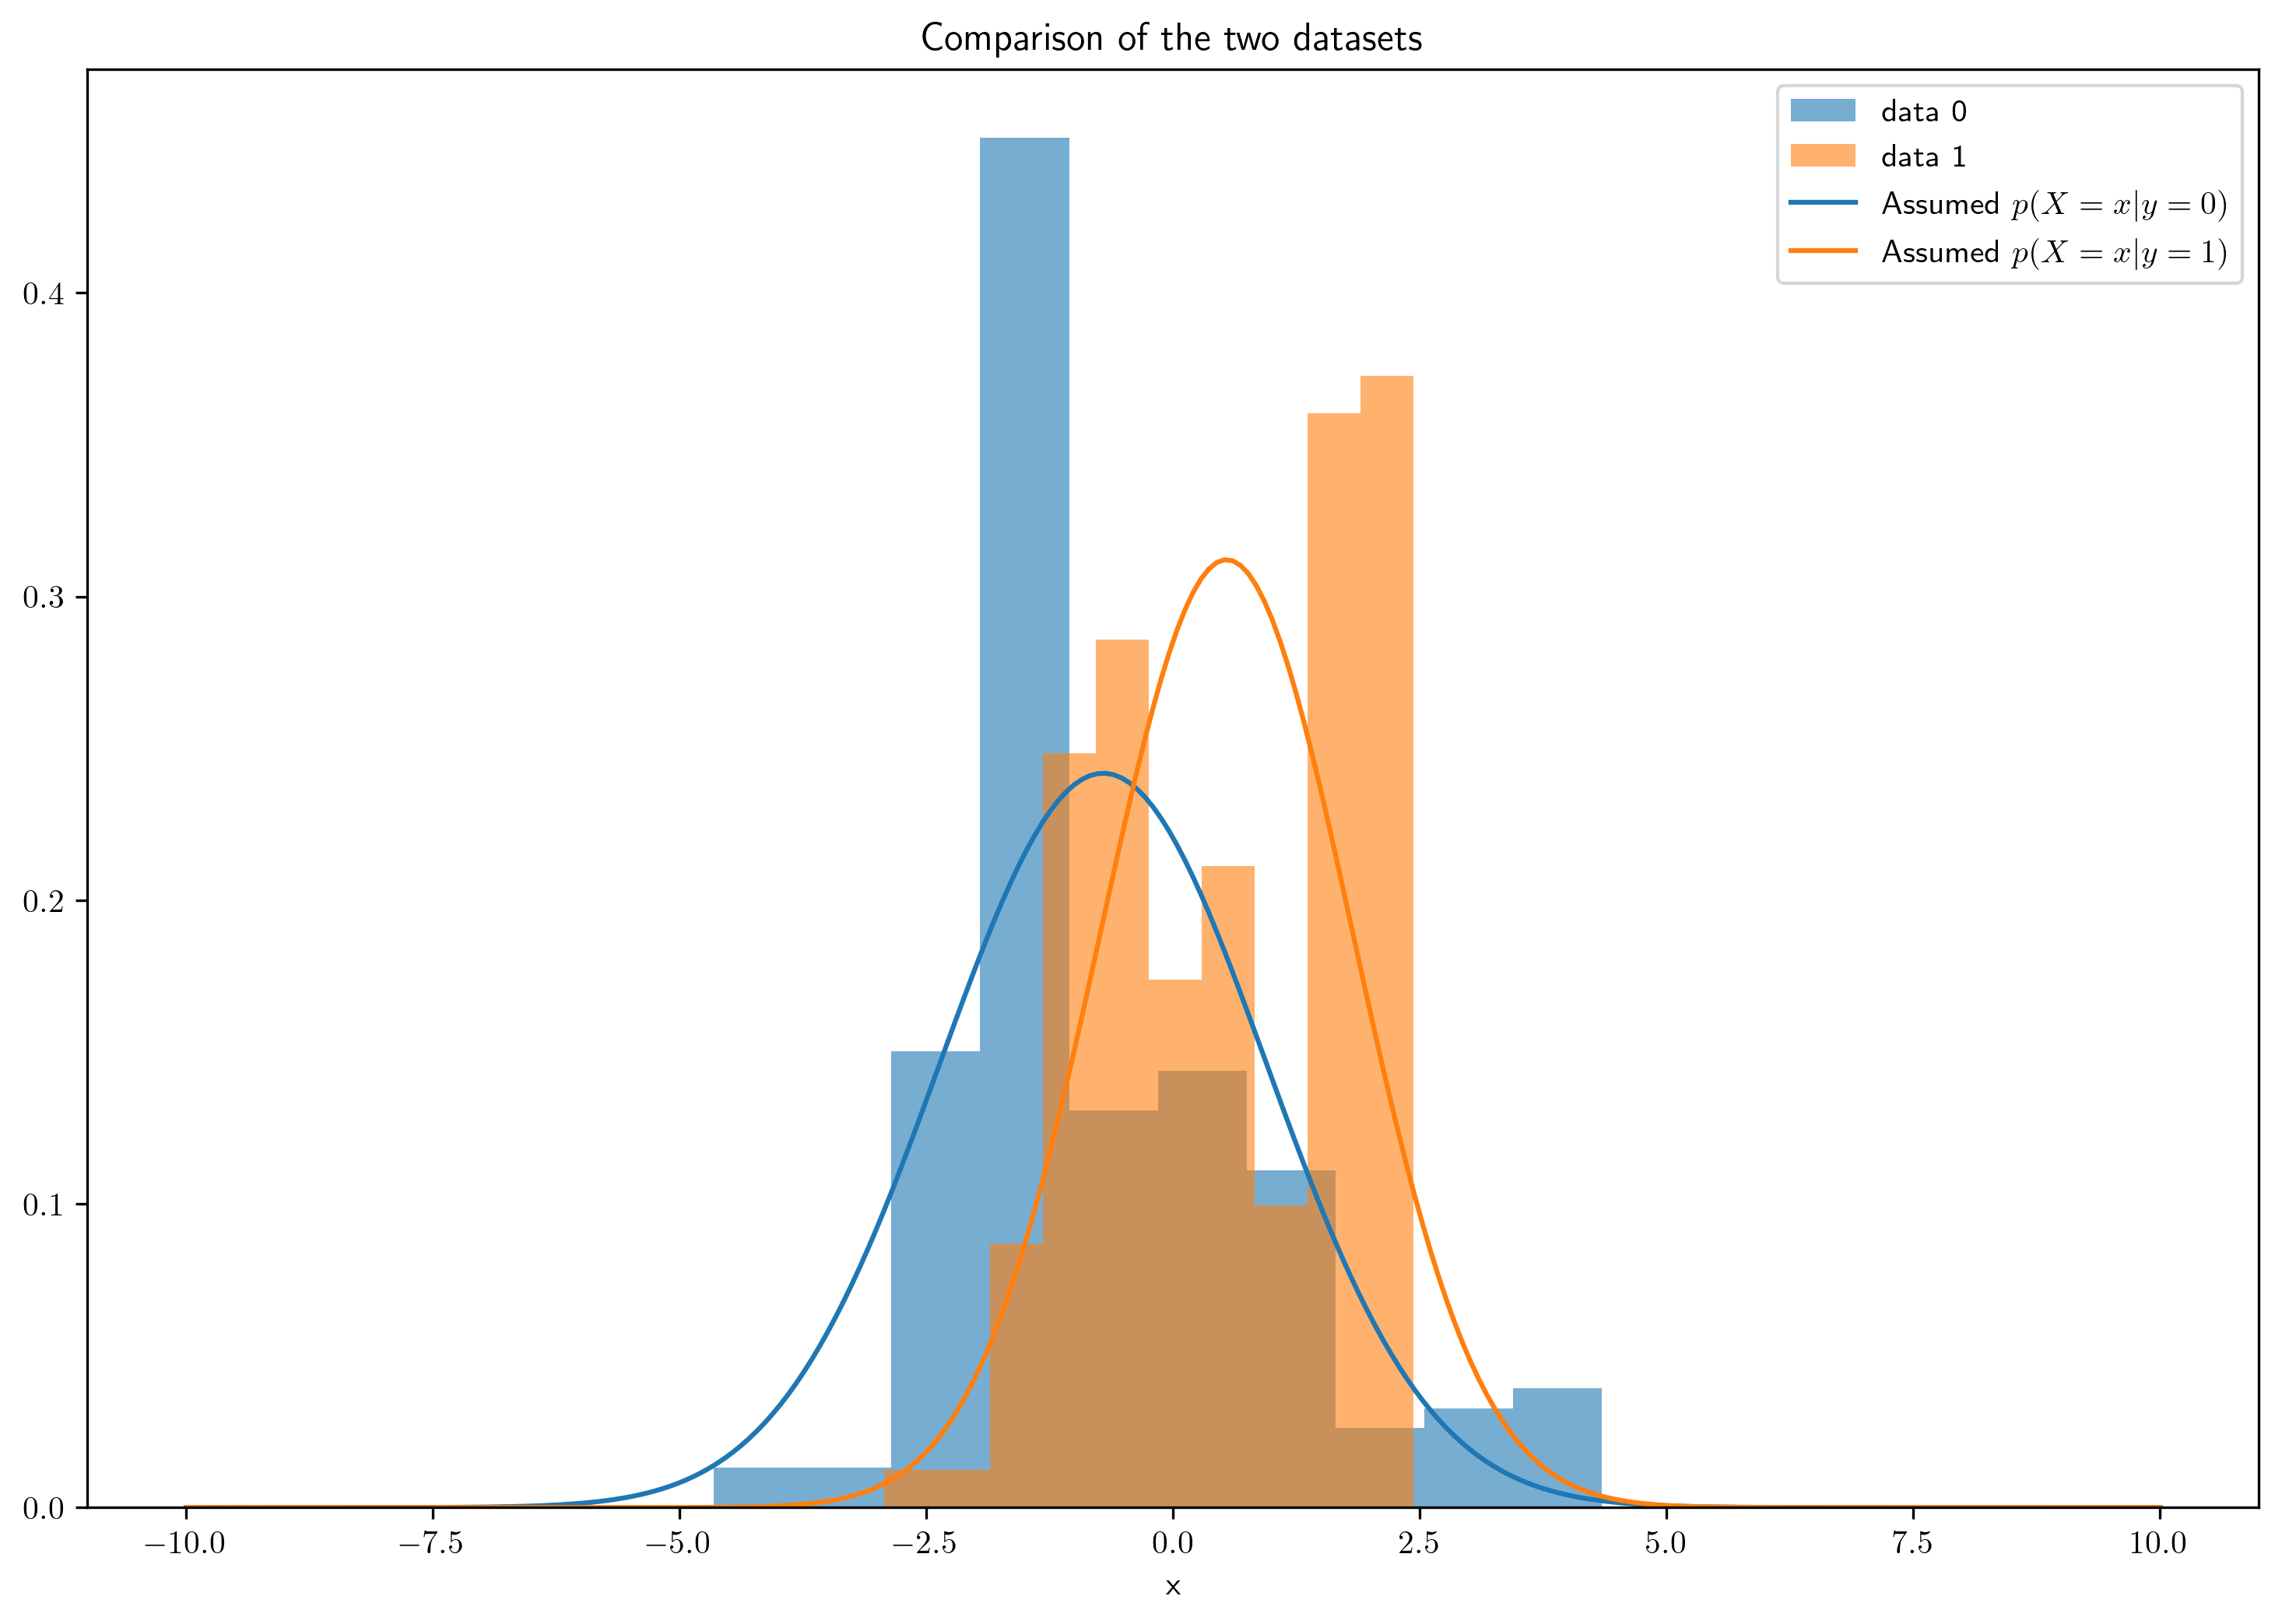

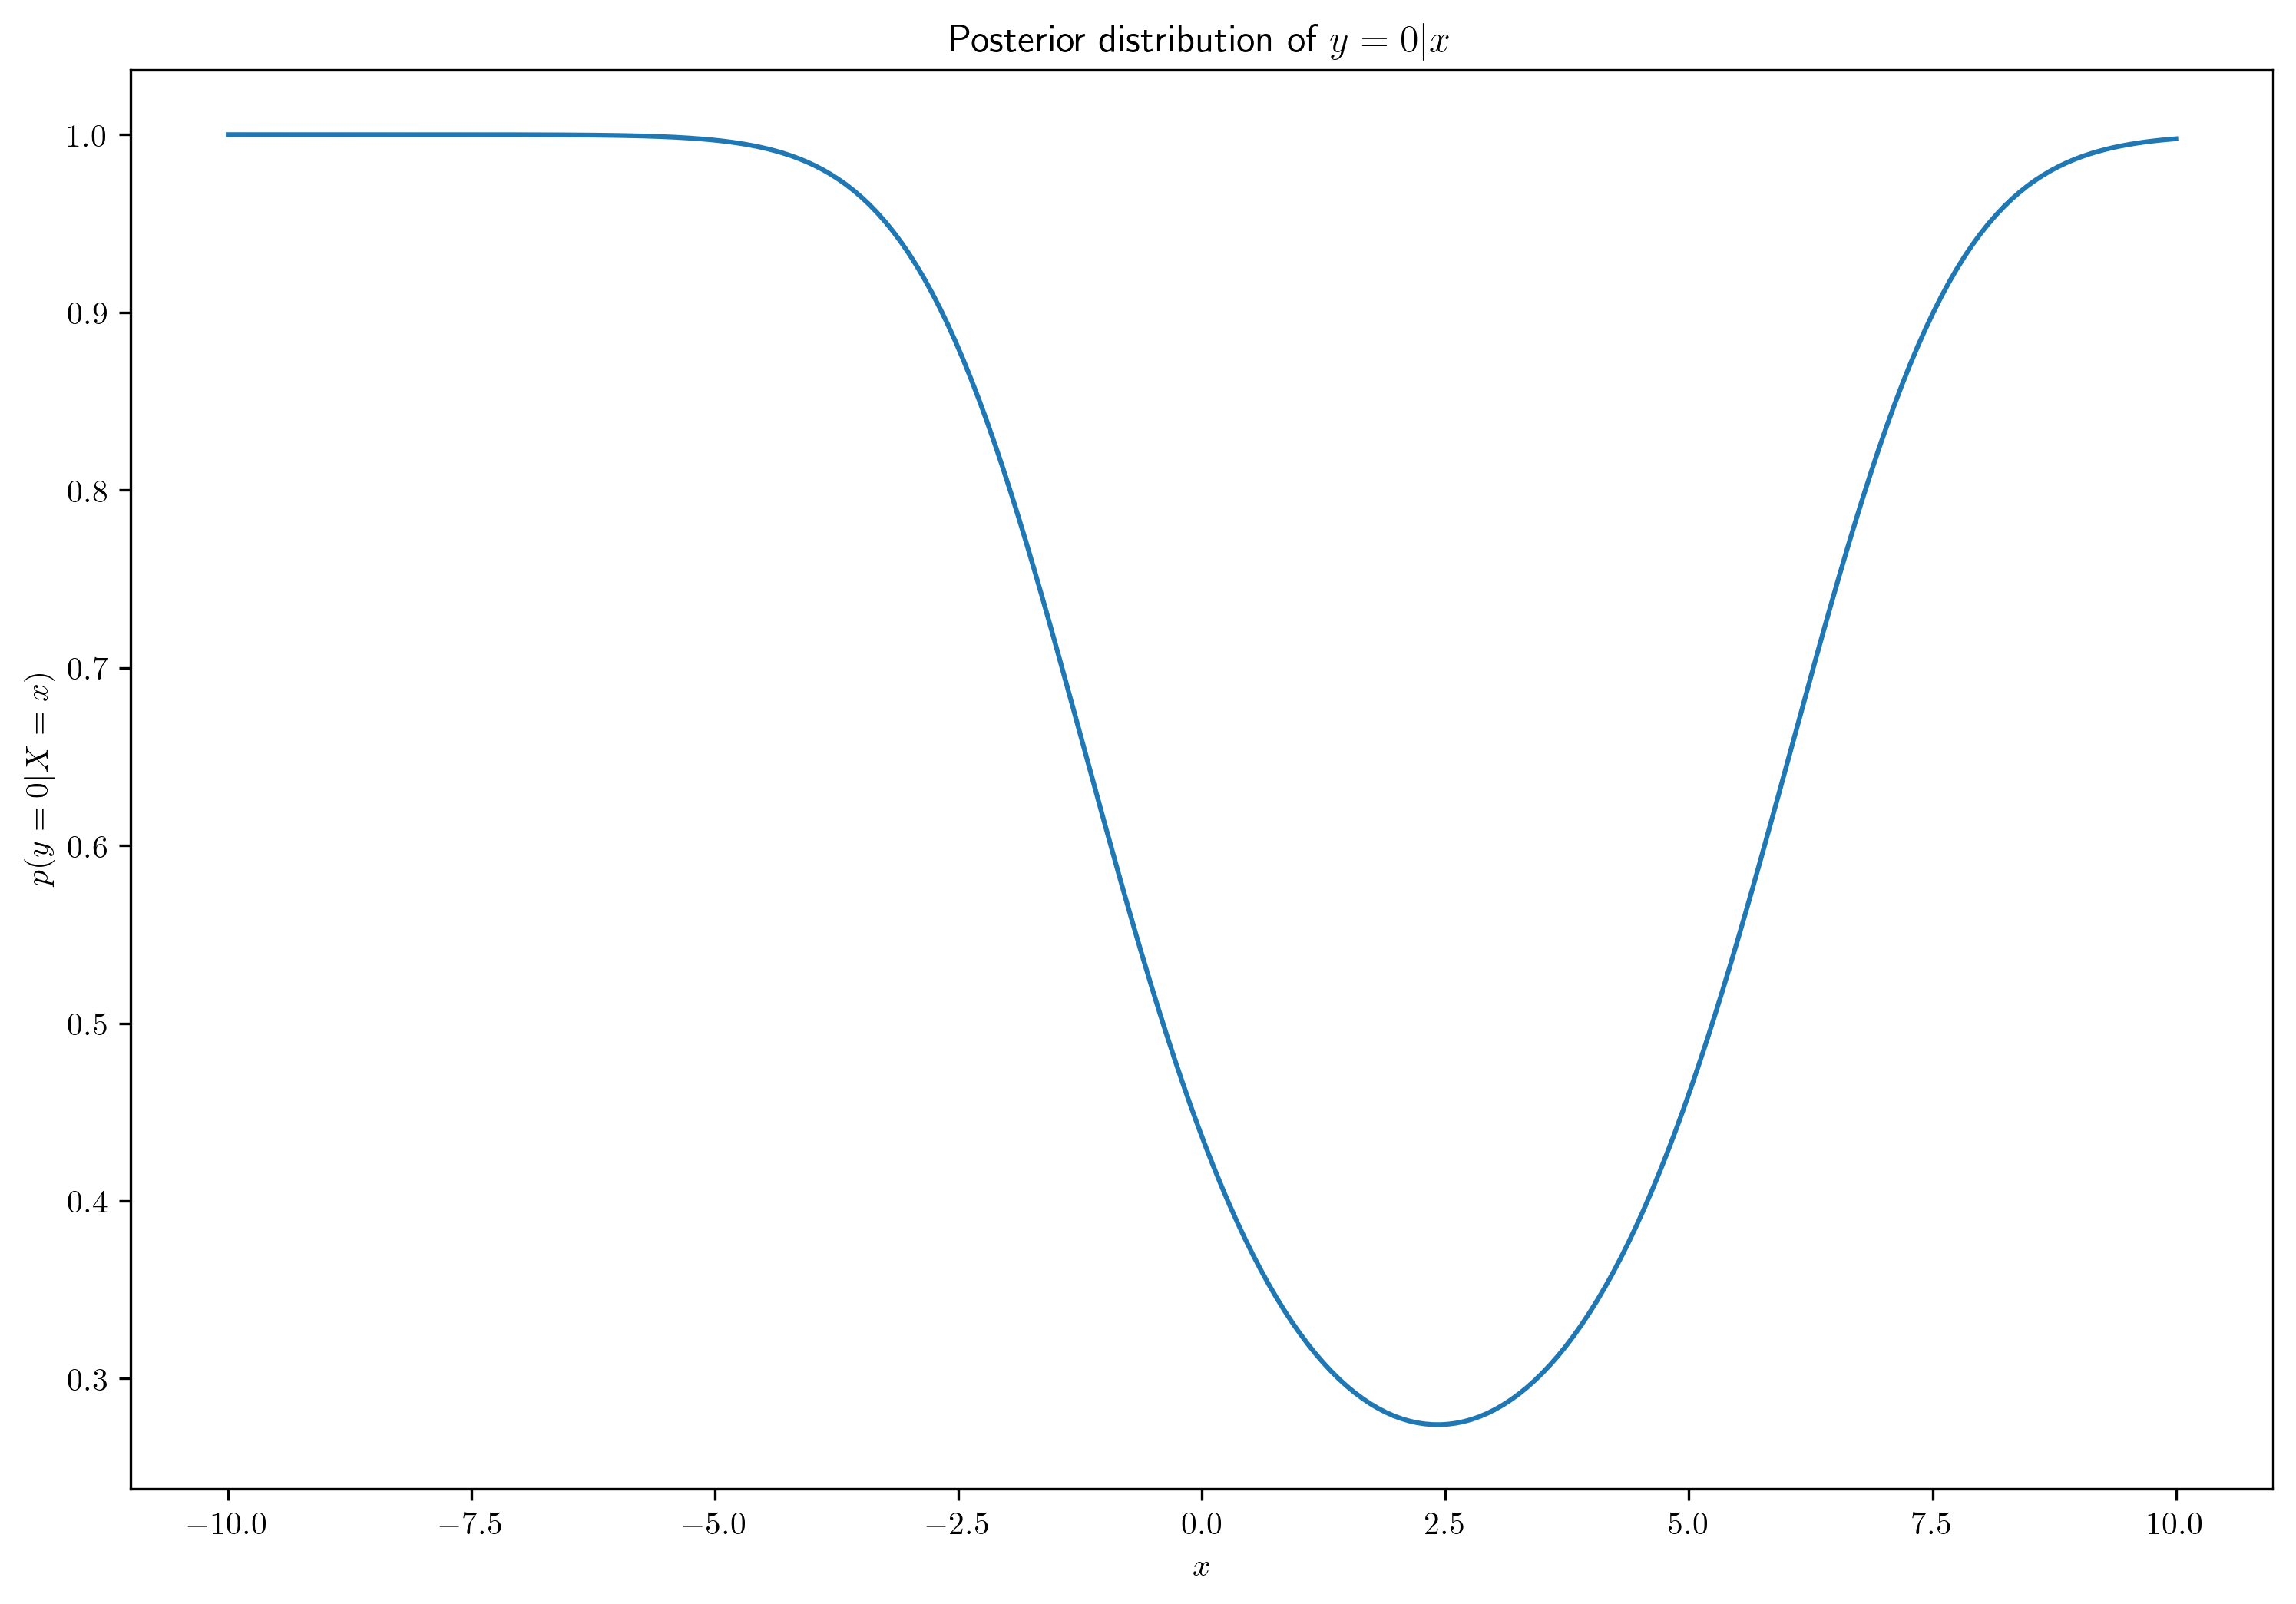

In [3]:
from scipy.stats import norm

# TODO: evaluate the Gaussian class densities in a range from -10 to 10
#plt.hist(pts0, density=True)
x=np.linspace(-10,10,250)
#plt.plot(x, norm.pdf(x, mean0, std0))
#plt.title('Gaussian estimation of points labelled "0"')
#plt.show()

#plt.hist(pts1, density=True)
#x=np.linspace(mean1-4*std1,mean1+4*std1,150)
#plt.plot(x, norm.pdf(x, mean1, std1))
#plt.title('Gaussian estimation of points labelled "1"')
#plt.show()

# add transparency to histograms (bc we use default matplotlib-colors, they even match the fits :D)
plt.hist(pts0, density=True, label='data 0', color='#1f77b499')
plt.hist(pts1, density=True, label='data 1', color='#ff7f0e99')
#x=np.linspace(mean0-4*std0,mean0+4*std0,150)
plt.plot(x, norm.pdf(x, mean0, std0), label=r'Assumed $p(X=x|y=0)$')
#x=np.linspace(mean0-4*std1,mean1+4*std0,150)
plt.plot(x, norm.pdf(x, mean1, std1), label=r'Assumed $p(X=x|y=1)$')
plt.title('Comparison of the two datasets')
plt.legend(loc='best')
plt.xlabel('x')
plt.show()
# TODO: evaulate the posterior p(y=1|x)

prob0 = norm.pdf(x, mean0, std0)
prob1 = norm.pdf(x, mean1, std1)
posterior = prob0/(prob0+prob1)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(y=0|X=x)$')
plt.title(r'Posterior distribution of $y=0|x$')
plt.plot(x,posterior)
# TODO: plot the class densities and the posterior p(y=1|x). (Don't forget title, axis labels, legend)


Our observation: The probability, that $y=0$ is very high (almost 1) for $x>9.5$ and $x<5$. This is because the Gaussian for $y=1$ is slimmer, so that the probability of $y=0$ is much higher than $y=1$ in these areas. In the interval $(-5,7.5)$, $p(y=0)$ has a lot of variation. This is centered around the area where the two gaussians pictured above overlap. At $x\approx2.5$, the probability of $y$ being zero takes its minimum. This is not located at the peak of the distribution of $p(X=x|y=1)$, but rather further to the right.

## 2 Mean of the Bernoulli distribution
$$\mathbb{E}[X]=\sum_{x\in\{0,1\}}\left(\mu^x (1-\mu)^{1-x}\cdot x\right)=\mu^1 (1-\mu)^0 + 0 = \mu$$

## 3 Trees and Random Forests
(a)

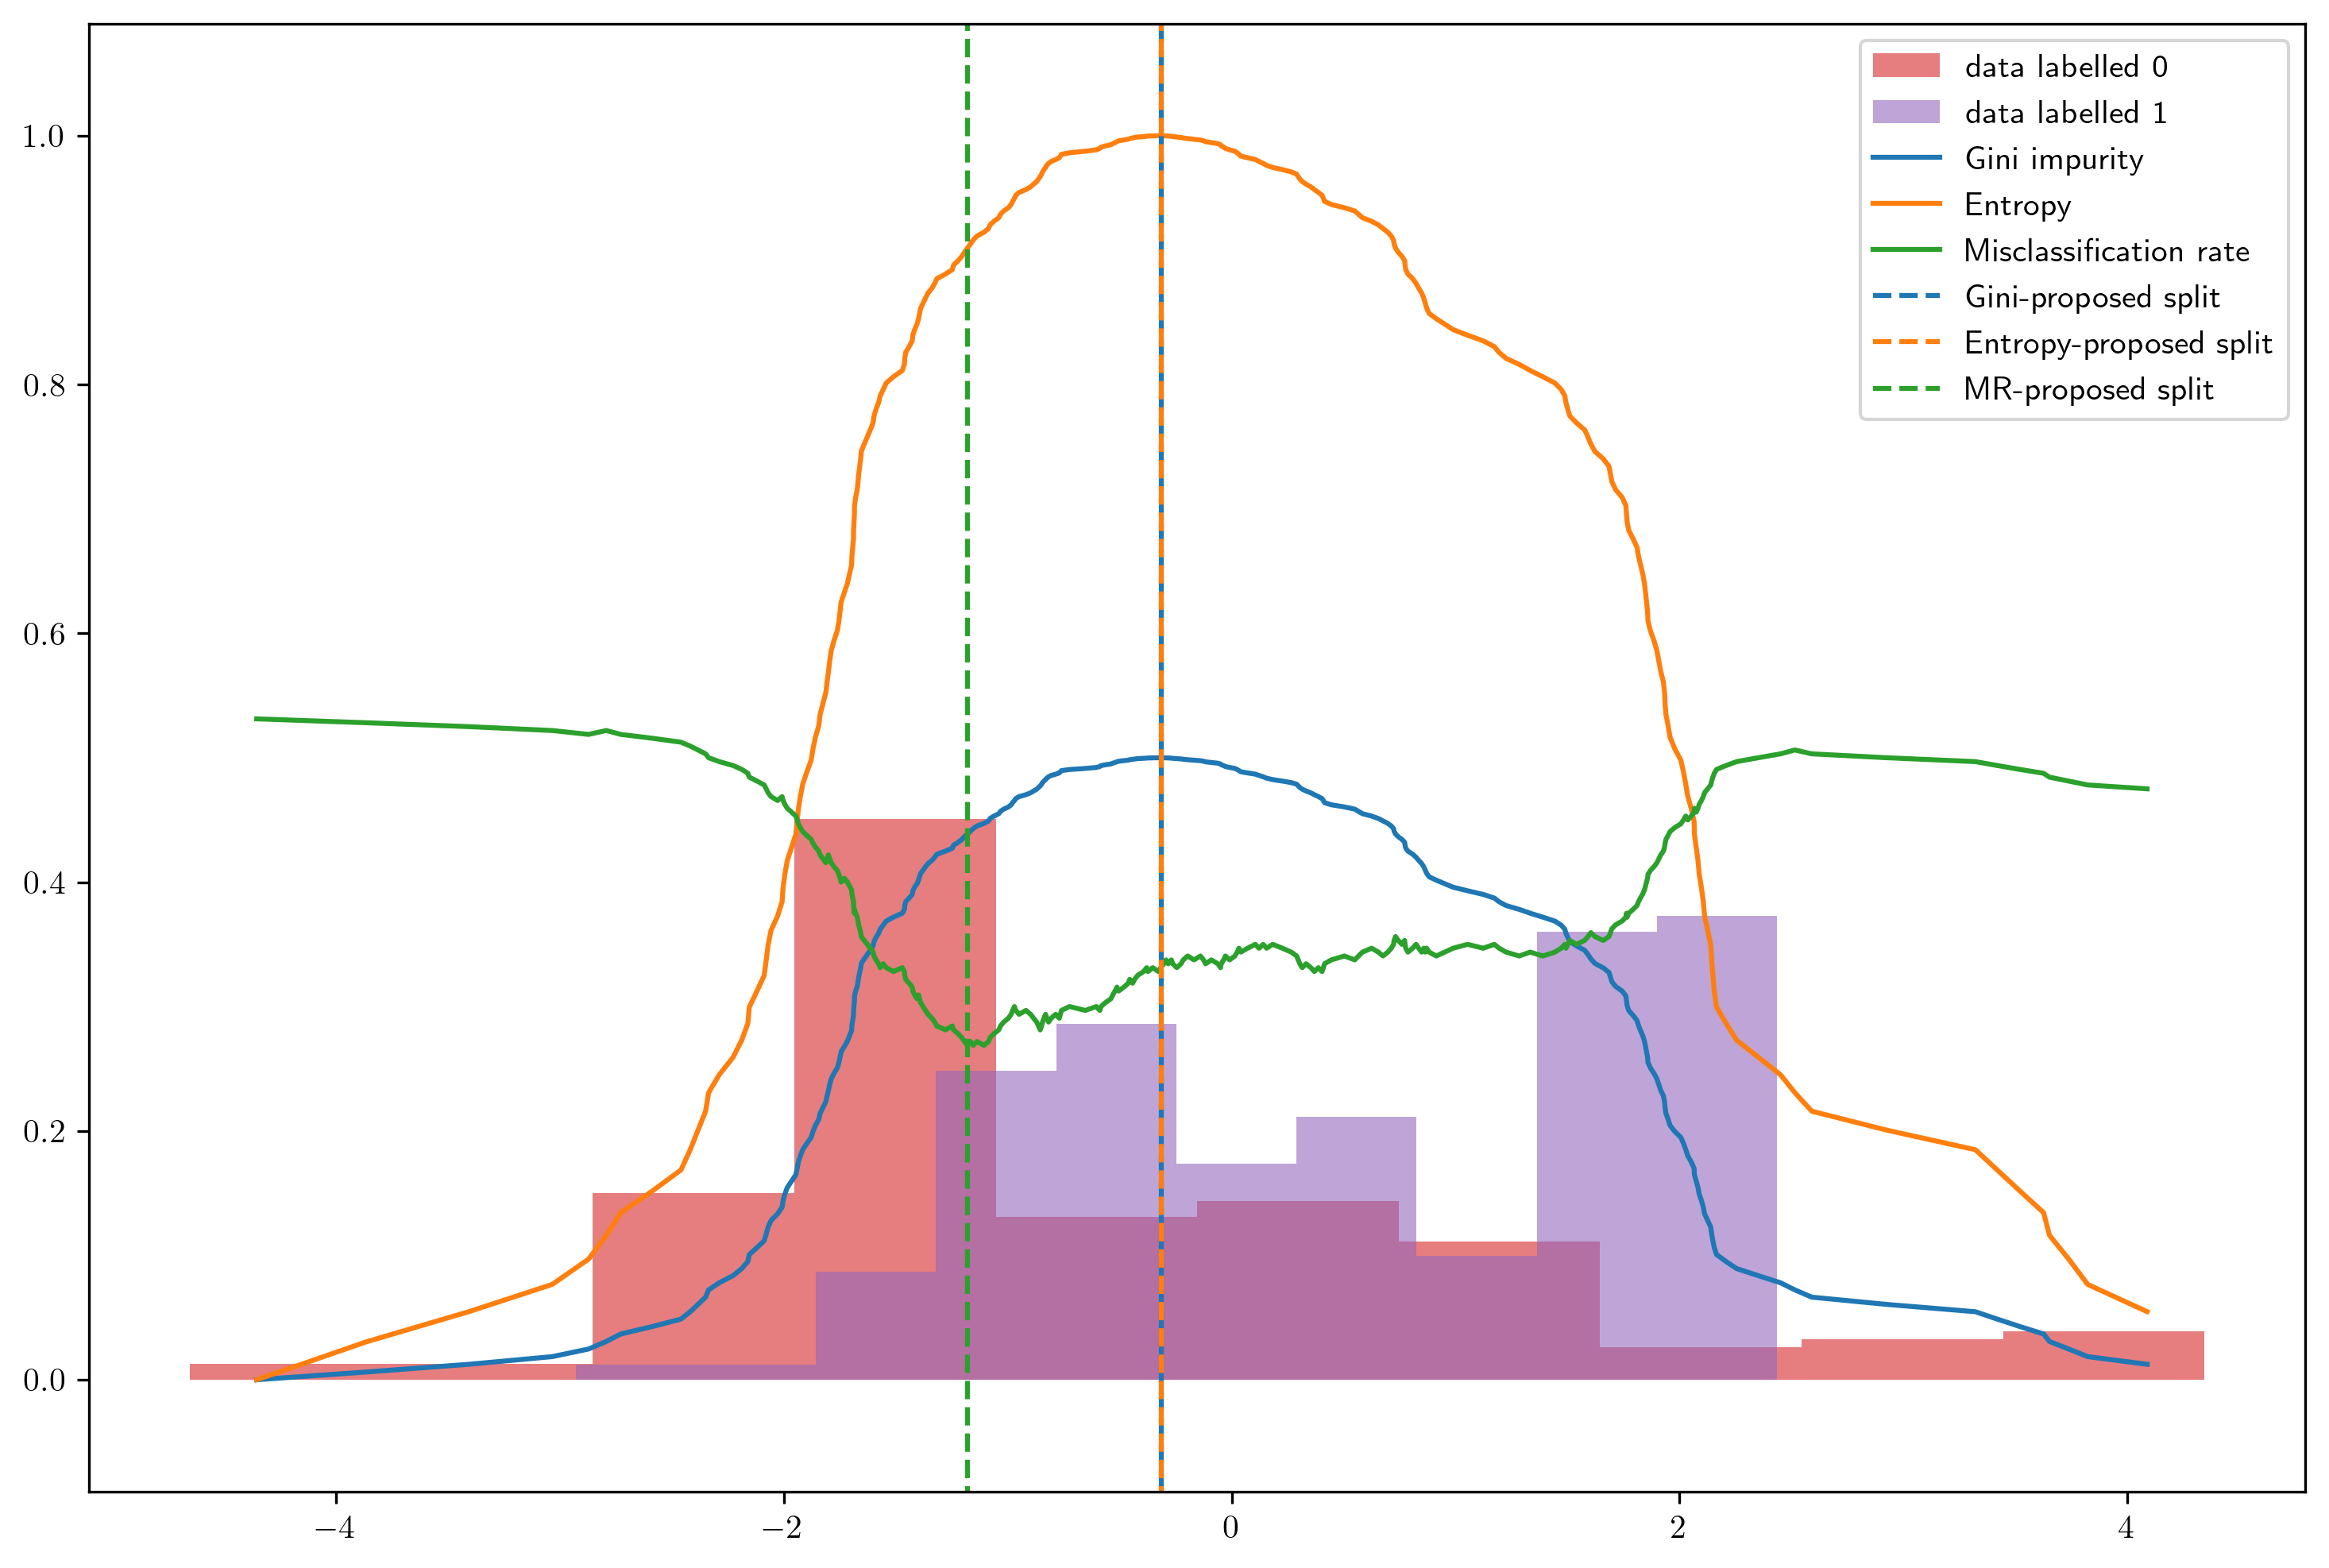

In [4]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')
#plt.hist(pts[np.where(labels==1)])
# TODO: Sort the points to easily split them
order = np.argsort(pts)
#print(order)
pts = pts[order]
labels = labels[order]
#plt.show()
#plt.hist(pts[np.where(labels==1)])
#plt.show()
splits=np.zeros(pts.shape[0]-1)
gini=np.zeros(pts.shape[0]-1)
entropy=np.zeros(pts.shape[0]-1)
misclassif=np.zeros(pts.shape[0]-1)
# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate
for i in range(len(pts)-1):
    splits[i] = (pts[i]+pts[i+1])/2
    p0 = i/len(pts)
    p1 = 1-i/len(pts)
    gini[i] = 1 - p0**2 - p1**2
    if p0 == 0:
        entropy[i] = -p1*np.log(p1)/np.log(2)
    elif p1 == 0:
        entropy[i] = -p0*np.log(p0)/np.log(2)
    else:
        entropy[i] = (-p1*np.log(p1) - p0*np.log(p0))/np.log(2)#divide by ln(2) for log_2(...)
    classification = np.zeros(pts.shape)
    classification[i:] = 1
    misclassif[i] = np.sum(np.abs(classification-labels)) / pts.shape[0]
    
# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
    
# TODO: Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)

# use transparency for the histograms; use C3 and C4 from matplotlib
plt.hist(pts[labels==0], density=True, label='data labelled 0', color='#d6272899')
plt.hist(pts[labels==1], density=True, label='data labelled 1', color='#9467bd99')
plt.plot(splits, gini, label='Gini impurity')
plt.plot(splits, entropy, label='Entropy')
plt.plot(splits, misclassif, label='Misclassification rate')
plt.ylim(-.09,1.09)
plt.vlines(splits[np.argmax(gini)], -.13, 1.12, colors='C0', label='Gini-proposed split', linestyles='dashed')
# we add 0.02, because the proposed splits 
plt.vlines(splits[np.argmax(entropy)], -.1, 1.1, colors='C1', label='Entropy-proposed split', linestyles='dashed')
plt.vlines(splits[np.argmin(misclassif)], -.1, 1.1, colors='C2', label='MR-proposed split', linestyles='dashed')
plt.legend(loc='best')
plt.show()

(b)

In [5]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy').T
labels = np.load('data/dijet_labels.npy')

#print(features.shape)
#print(labels.shape)
# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)
order = np.random.shuffle(np.arange(len(labels)))
features = features[order][0]
labels = labels[order][0]
#print(features.shape)
#print(labels.shape)
#data is now shuffled
# to get validation and training sets, we use sklearn.cross_validation.train_test_split
# this only splits in training and validation set, so we use it twice :D
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test= train_test_split(features, labels, test_size=200)

features_train, features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=200)

In [6]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of hyperparameters as specified on the sheet
#       and evaluate the performances on the validation set.
nTreess = [5, 10, 20, 100]
criteria = ['gini', 'entropy']
depths = [2, 5, 10, None] # according to documentation: When passing max_depth=None,
# sklearn will work until all leaves are pure
scores = np.zeros((4, 2, 4))

for i, nTrees in enumerate(nTreess):
    for j, criterion in enumerate(criteria):
        for k, depth in enumerate(depths):
            forest = RandomForestClassifier(n_estimators=nTrees, criterion=criterion, max_depth=depth)
            forest.fit(features_train, labels_train)
            scores[i,j,k] = forest.score(features_val, labels_val)

In [7]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set
best_params = np.unravel_index(scores.argmax(), scores.shape)

print(f'The best set of hyperparameters are:\nNumber of Trees: {nTreess[best_params[0]]}\nCriterion: {criteria[best_params[1]]}\nMax depth: {depths[best_params[2]] if depths[best_params[2]] is not None else "pure"}')
forest = RandomForestClassifier(n_estimators=nTreess[best_params[0]], criterion = criteria[best_params[1]],
                               max_depth=depths[best_params[2]])
forest.fit(features_train, labels_train)
score = forest.score(features_test, labels_test)
rate = 1 - np.sum(np.abs(forest.predict(features_test)-labels_test))/200
print(f'Performance of the test set: score = {score}, got {rate*100}% right')

The best set of hyperparameters are:
Number of Trees: 10
Criterion: entropy
Max depth: pure
Performance of the test set: score = 0.75, got 74.5% right


## 4 Beta Distribution
a)
The prior distribution is taken to be $$\mu_x=\frac{c_{x,1}}{c_{x,0}+c_{x,1}}.$$

The posterior distribution is then $p(\mu_x|c_{x,y}=1)$, because $c_{x,y}$ are per definition our observations. It is obtained following Bayes' rule:
\begin{align}
p(\mu_x|c_{x,y}=1) &= \frac{p(c_{x,y}=1|\mu_x)p(\mu_x)}{p(c_{x,y}=1)},
\end{align}
where
\begin{align}
p(c_{x,y}=1|\mu_x) &= \text{Bern}(c_{x,y}=1;\mu_x)=\mu_x\\
p(\mu_x) &= 1\\
p(c_{x,y}=1) &= \frac{c_{x,1}}{c_{x,0}+c_{x,1}},
\end{align}
where $p(\mu_x) = 1$ follows from what is given in the code cell below, i.e. we use a flat prior.

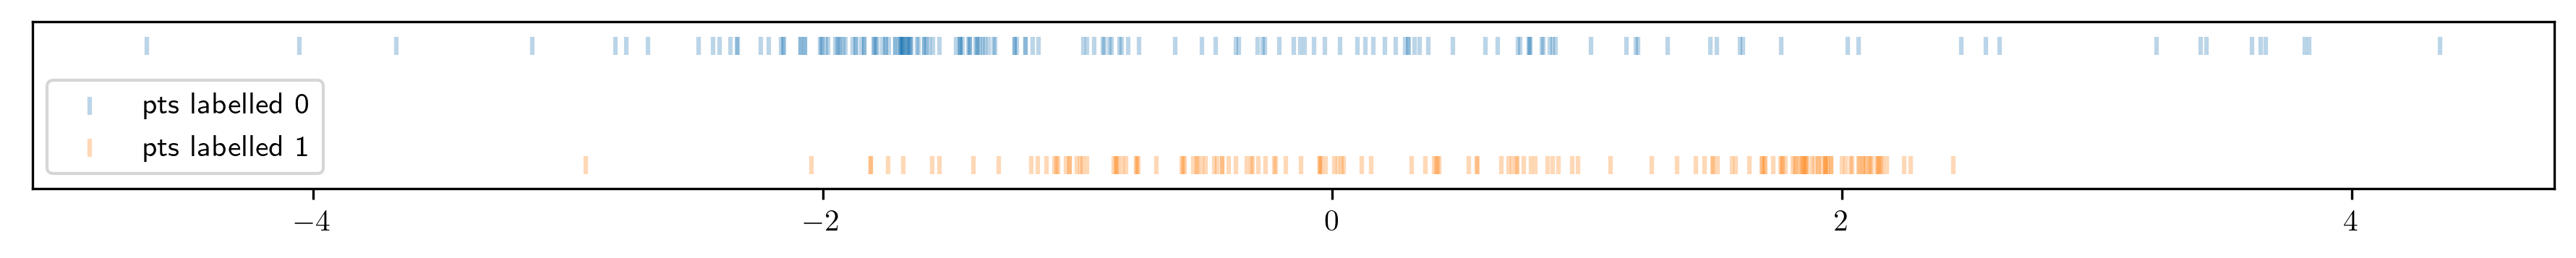

In [8]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# split the data into the classes
pts1 = pts[labels==0]
pts2 = pts[labels==1]

# plot the data
fig, ax = plt.subplots(figsize=(15, 1))
plt.scatter(pts1, np.ones_like(pts1), label='pts labelled 0', marker='|', alpha=0.3)
plt.scatter(pts2, np.zeros_like(pts2), label='pts labelled 1', marker='|', alpha=0.3)
plt.legend()
plt.yticks([])
plt.ylim(-0.2, 1.2)
plt.show()

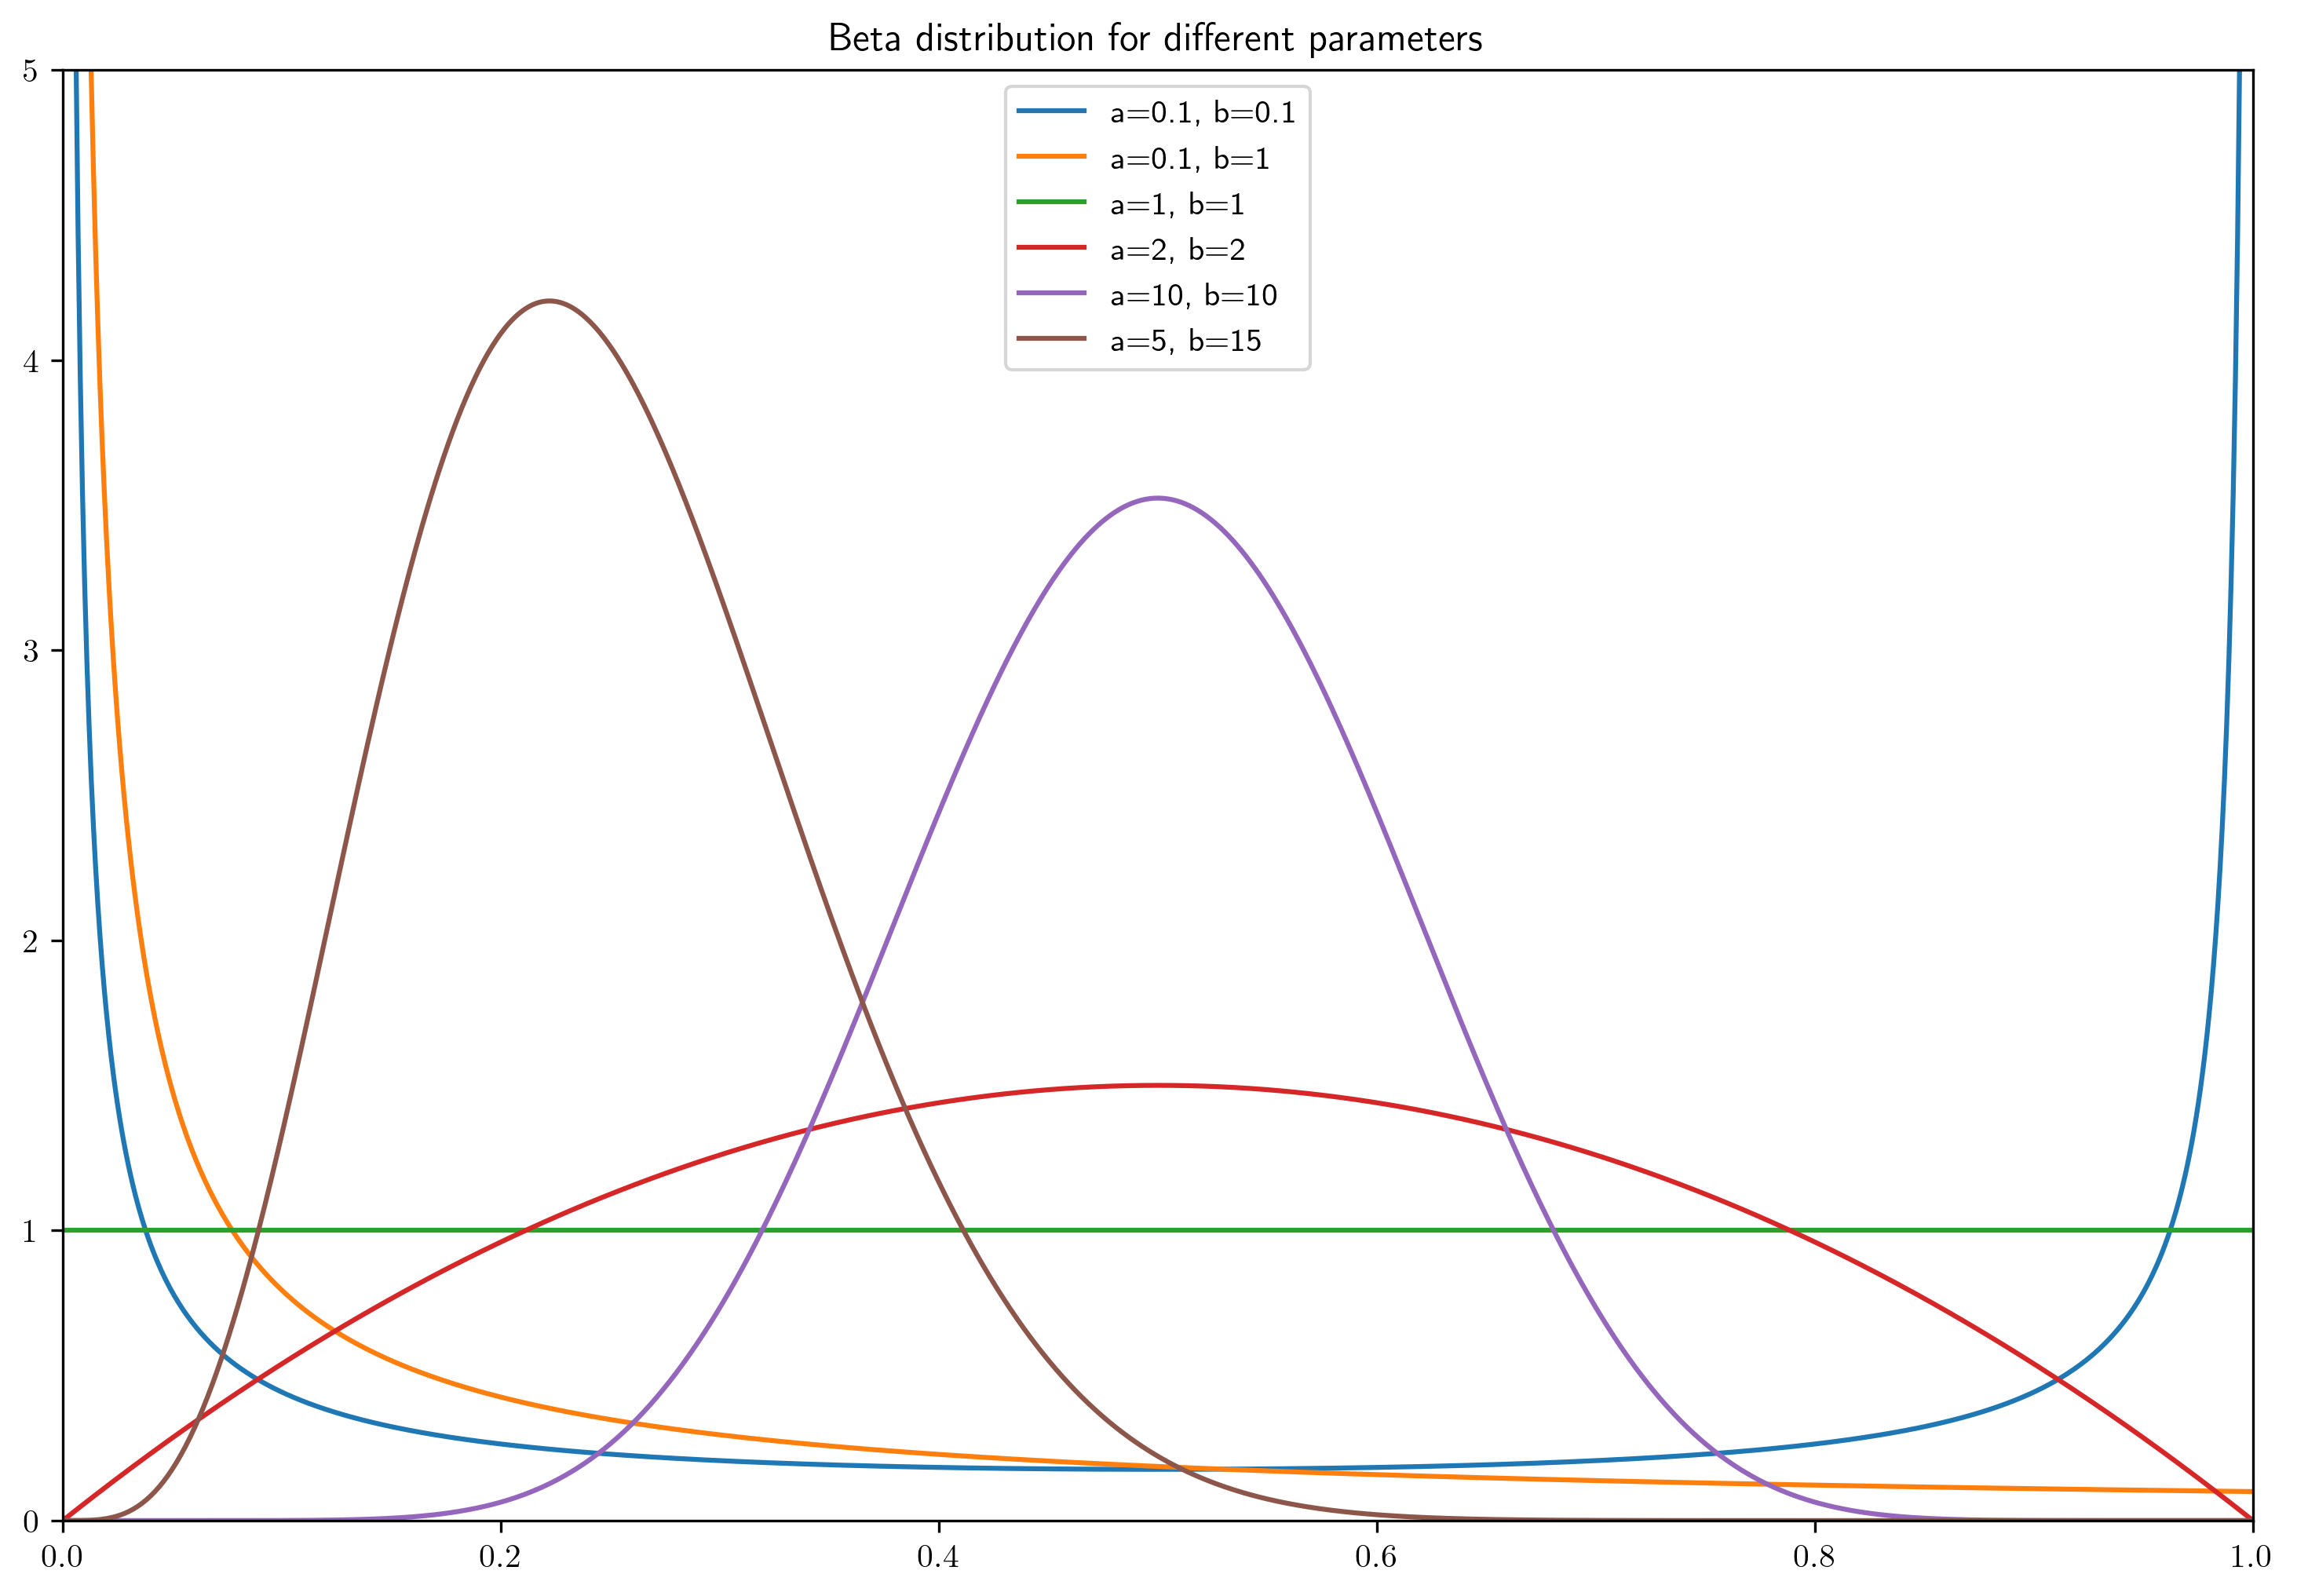

In [9]:
from scipy.special import gamma, gammaln

def beta_pdf(x, a, b):
    """Probability density function for the Beta distribution with parameters a and b. Works verctorized over all inputs"""
#     return (gamma(a+b) * x**(a-1) * (1-x)**(b-1)) / gamma(a) / gamma(b)  # breaks down for larger a, b
    return np.exp(gammaln(a+b) - gammaln(a) - gammaln(b) + np.log(x)*(a-1) + np.log(1-x)*(b-1))  # works for larger a, b

eps = 1e-6
x = np.linspace(eps, 1-eps, 1000, endpoint=True)
for a, b in ((0.1, 0.1), (0.1, 1), (1, 1), (2, 2), (10, 10), (5, 15)):
    plt.plot(x, beta_pdf(x, a, b), label=f'{a=}, {b=}')
plt.legend()
plt.ylim(0, 5)
plt.xlim(0, 1)
plt.title('Beta distribution for different parameters')
plt.show()

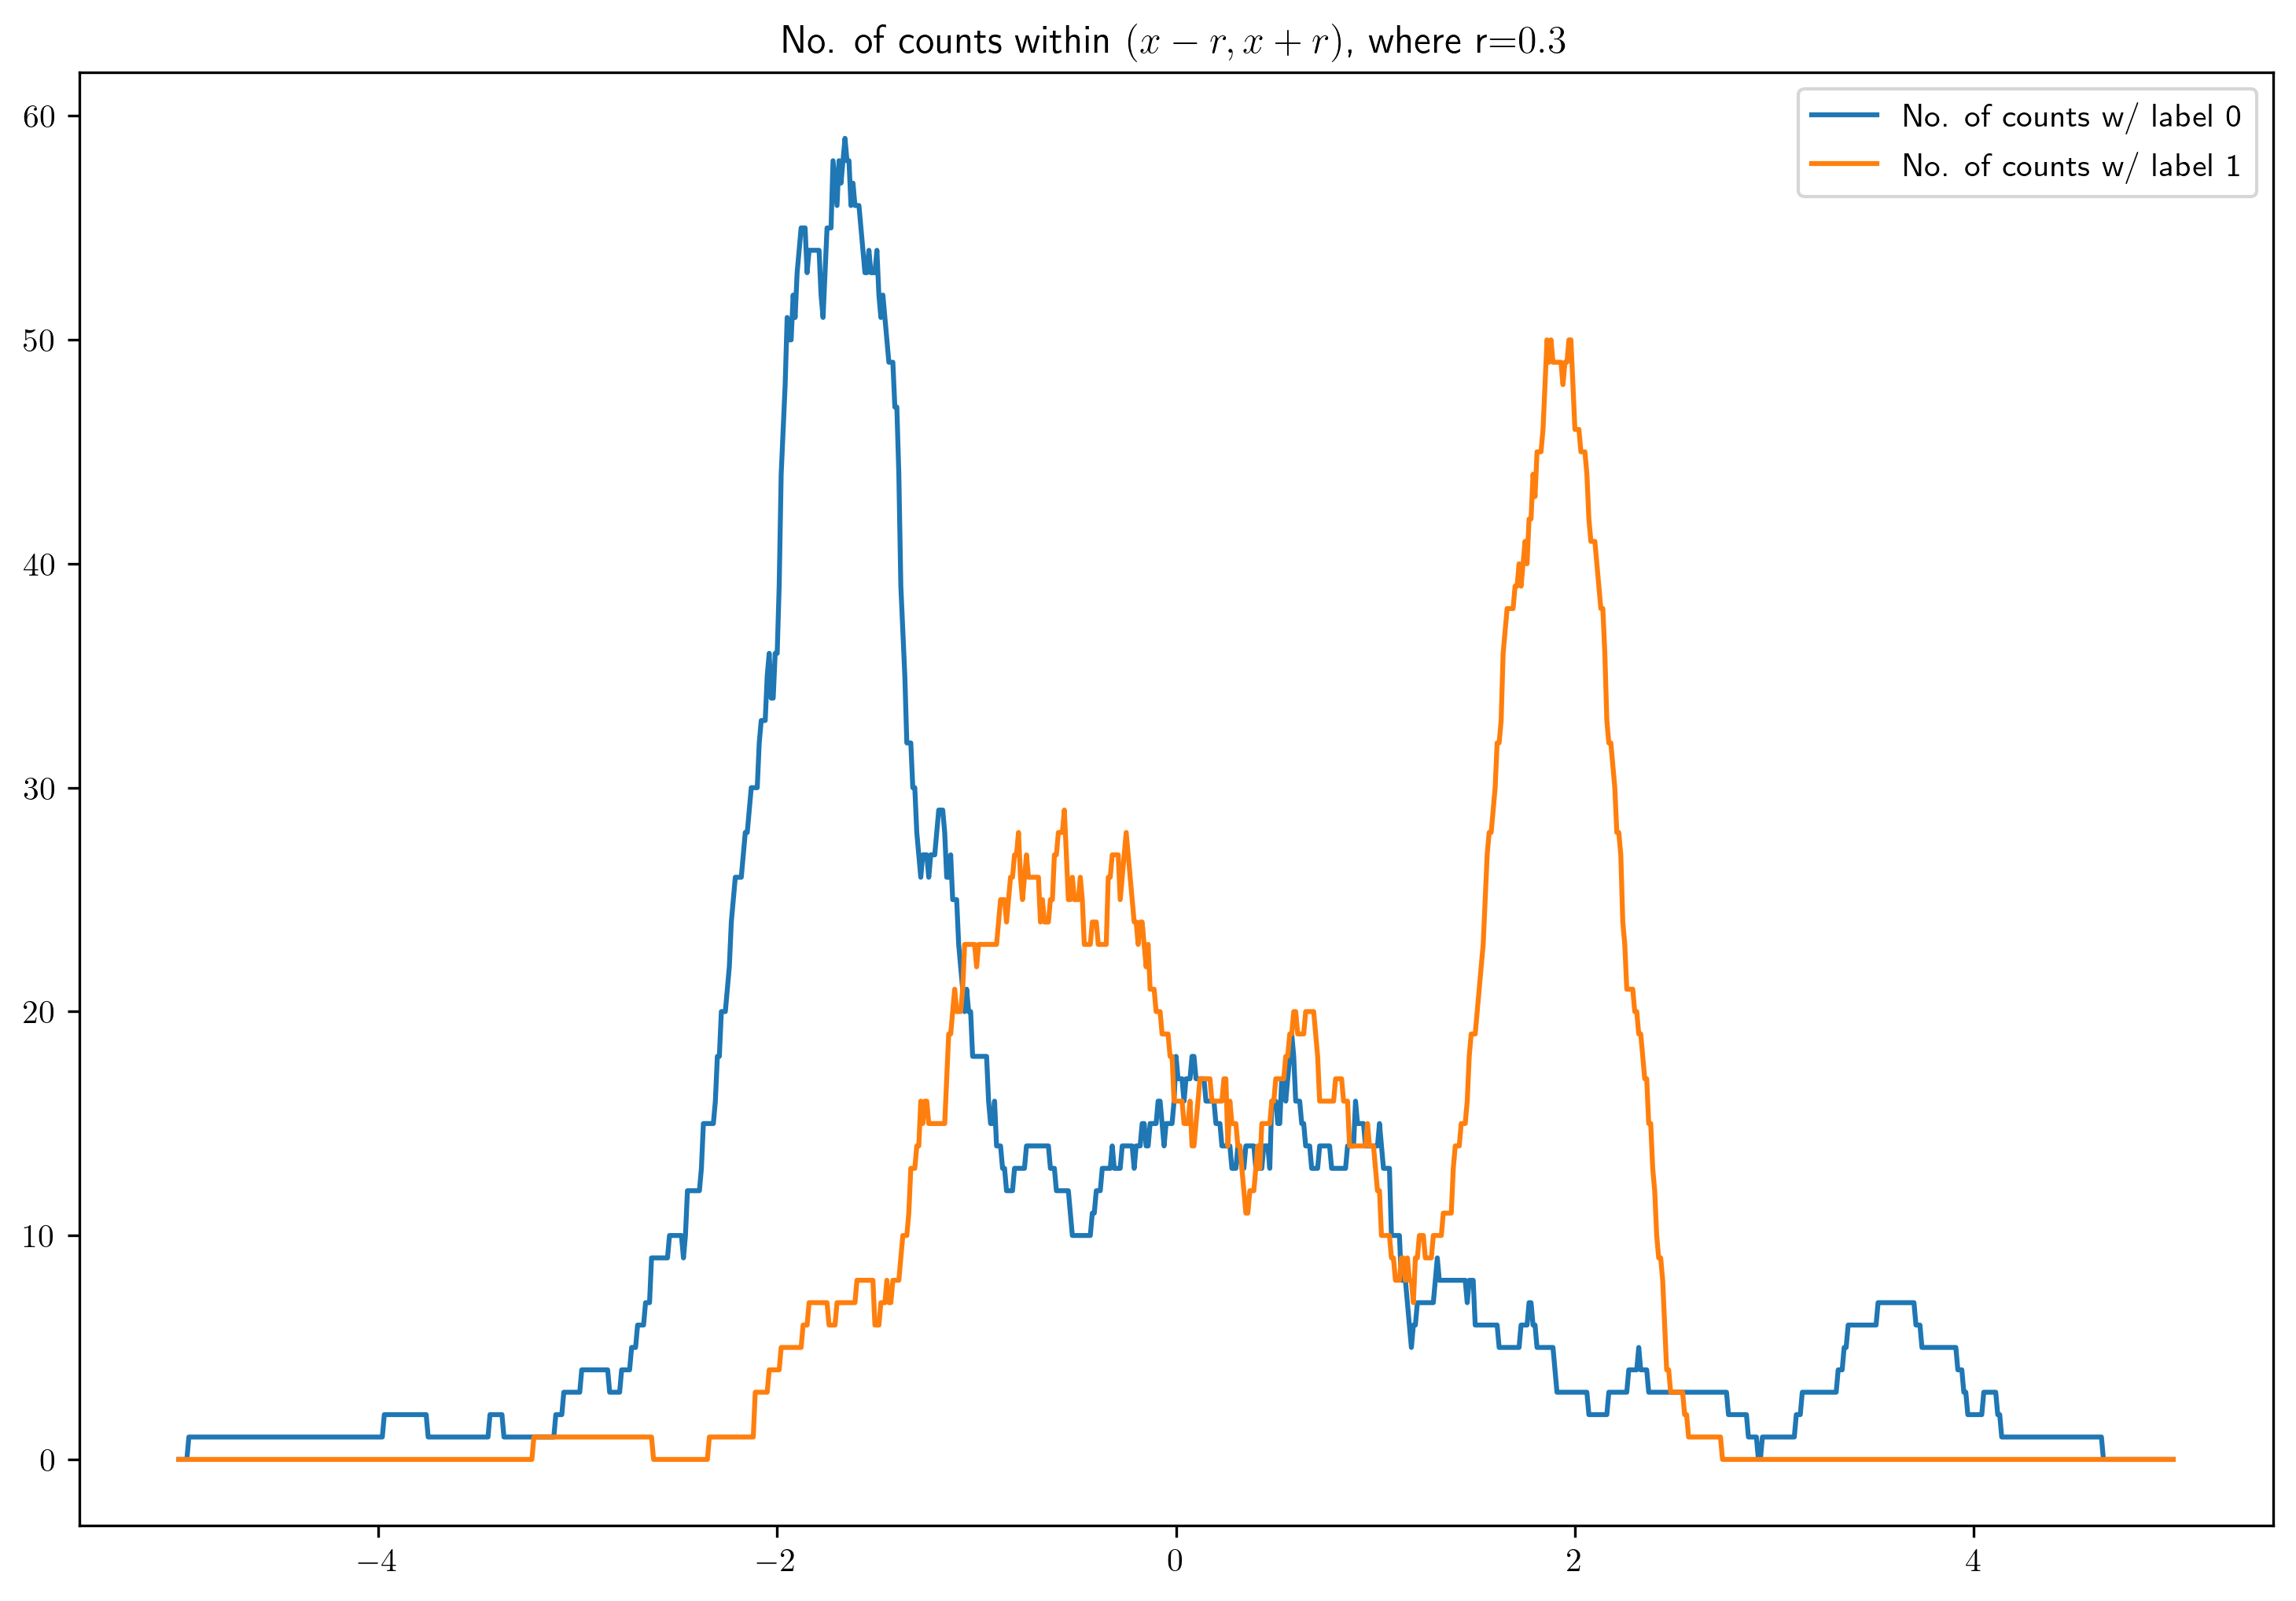

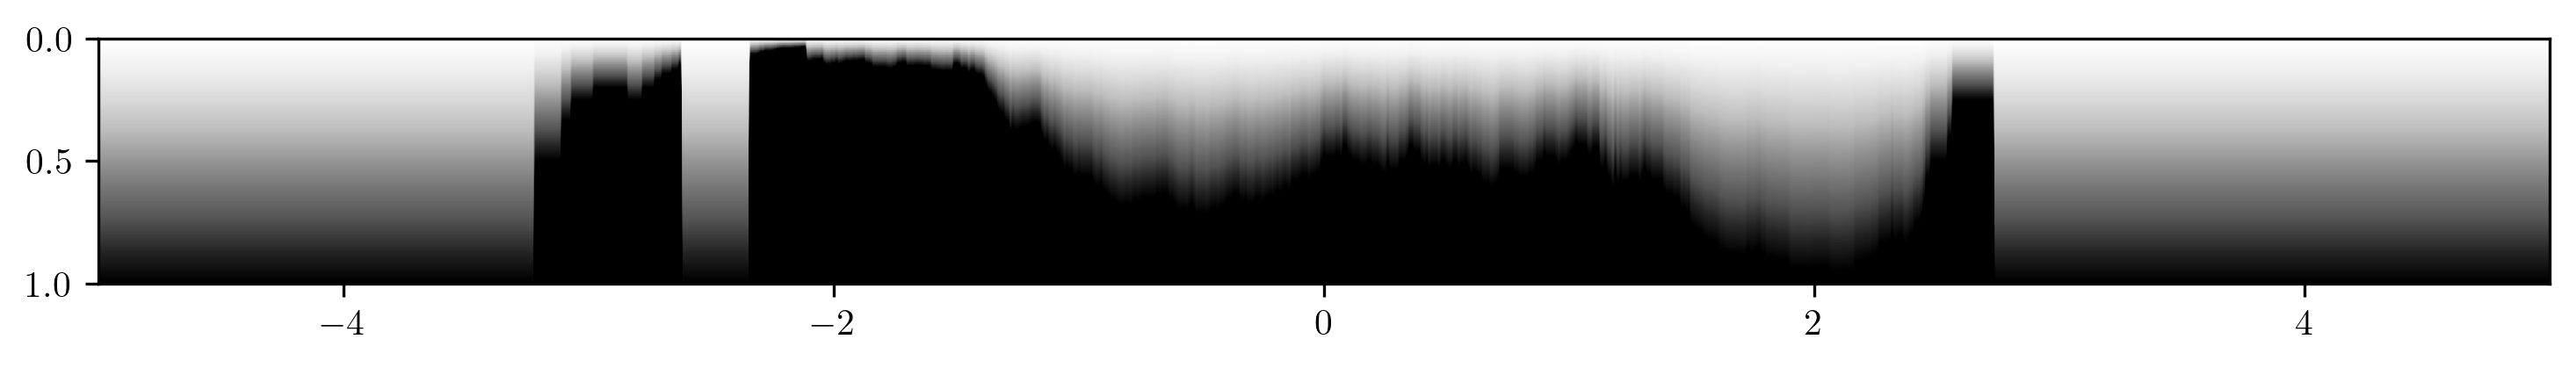

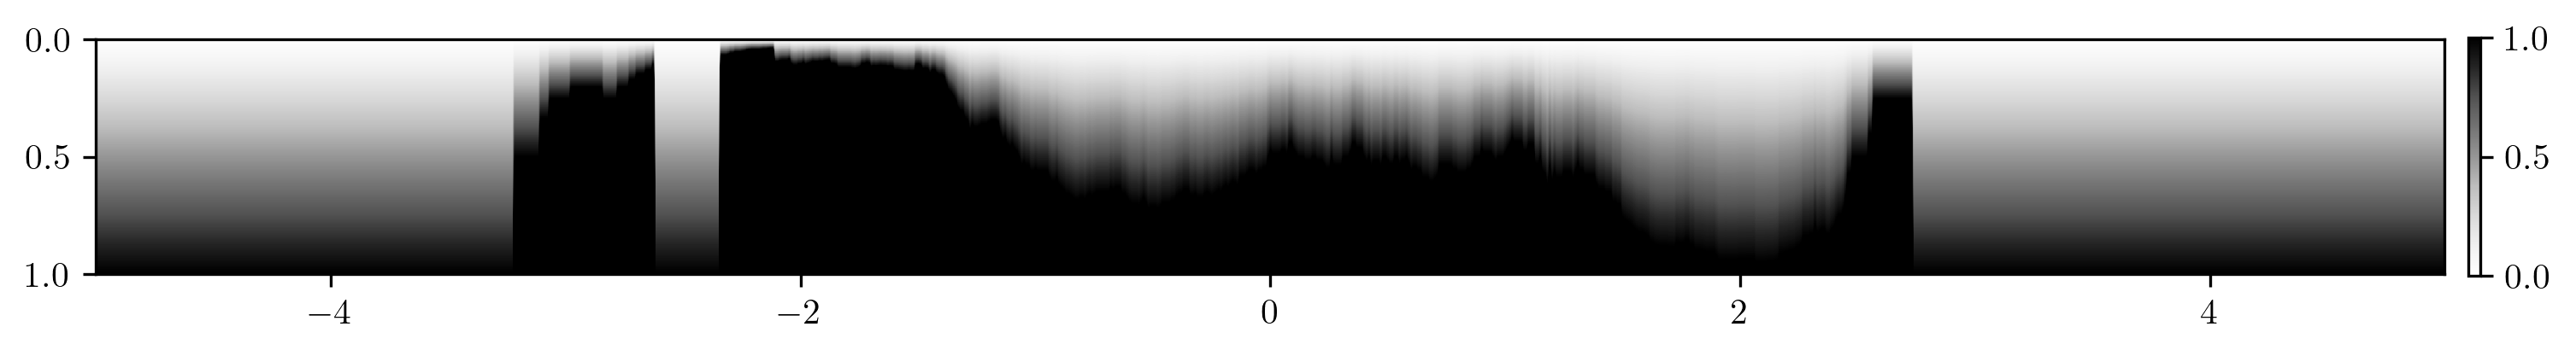

In [10]:

def count_points_within_distance(x, pts, r):
    """
    Count number of points among pts within a distance r of query points x (in 1D).
    
    Parameters
    ----------
    x : np.ndarray
        Query points of shape (M).
    pts : np.ndarray
        Points to be searched, shape (N).
    r : float
        radius.
        
    Returns
    -------
    np.ndarray
        Array of counts of shape (M)
        
    """
    # TODO: sort the points
    spts = np.sort(pts)
    # TODO: use np.searchsorted on the interval boundaries 
    #       to find number of points inside each interval (don't use loops!)
    counts = np.searchsorted(spts, x+r) - np.searchsorted(spts, x-r)
    
    return counts

# use a flat prior
prior_a, prior_b = 1, 1

# define value range
vmin, vmax = -5, 5

# set the radius
r = .3

# TODO: sample x and mu as described in the exercise
x = np.linspace(-5, 5, 1001, endpoint=True)
mu = np.linspace(0, 1, 101, endpoint=True)

# TODO: use count_points_within_distance to calculate the counts
cts0 = count_points_within_distance(x, pts[labels==0], r)
cts1 = count_points_within_distance(x, pts[labels==1], r)

# TODO (optional): plot the counts vs x
plt.plot(x, cts0, label='No. of counts w/ label 0')
plt.plot(x, cts1, label='No. of counts w/ label 1')
plt.title(r'No. of counts within $(x-r,x+r)$, where r=${:.1f}$'.format(r))
plt.legend(loc='best')
plt.show()
# TODO: evaluate the posterior to get an image (use broadcasting, no loops needed!)
# avoid divide-by-zero-errors; in this case just keep the prior
denom1 = (cts0+cts1)
denom1[denom1==0] = 1
denom = cts1/denom1
denom[denom==0] = 1
denom[denom1==0] = 1
posterior = np.tile(mu, (1001,1)).T / np.tile(denom, (101,1))
# TODO: plot the posterior as an image, specify the correct origin and extent
plt.imshow(posterior, origin='upper', extent=(-5,5,1,0), cmap='Greys', vmin=0., vmax=1.)
plt.show()

# we plot it again with a colorbar, but then the x-axes of the counts and the matrix do not line up anymore
plt.imshow(posterior, origin='upper', extent=(-5,5,1,0), cmap='Greys', vmin=0., vmax=1.)
# colorbar with scaling magic courtesy of: https://stackoverflow.com/a/26720422
plt.colorbar(fraction=0.005, pad=0.01)
plt.show()

Interpretation of the results above:

If the number of counts with label `0` is higher (i.e. when our observation is mostly zero), the probability of $\mu_x$ being lower is higher. In these regions, the lower $\mu$-values are much darker.

Further we observe, that all high values of $\mu$ still have a dark color, i.e. a high posterior probability. This shows the high influence of the prior distribution.

(d) Repetition for higher and lower values of r:

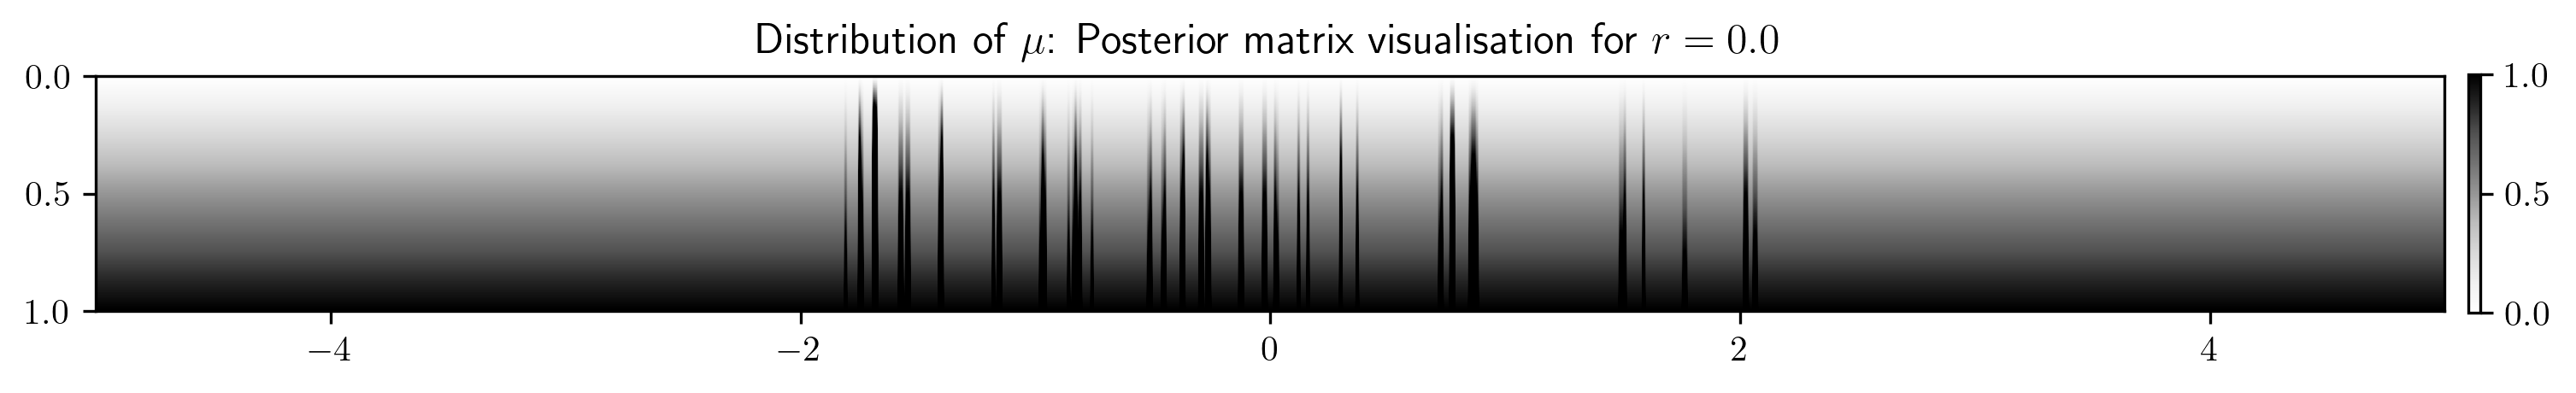

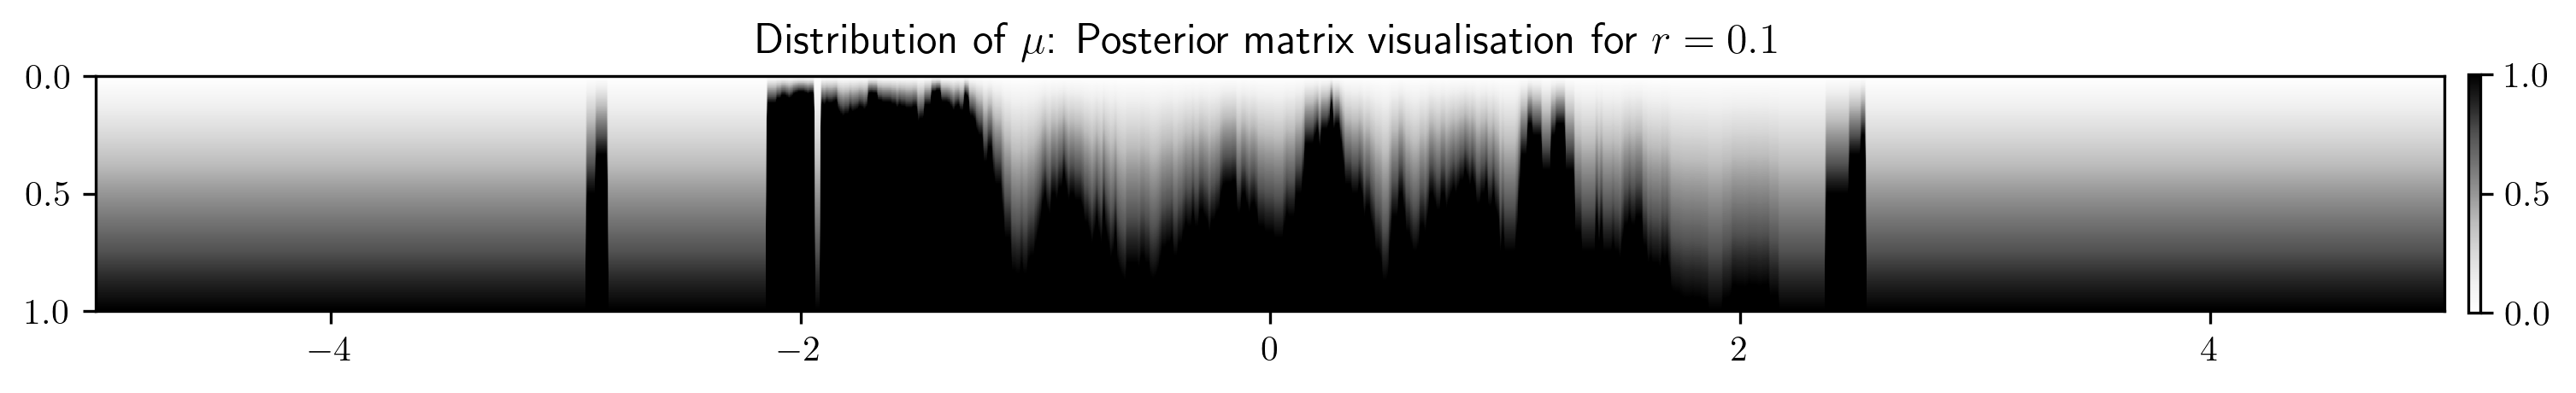

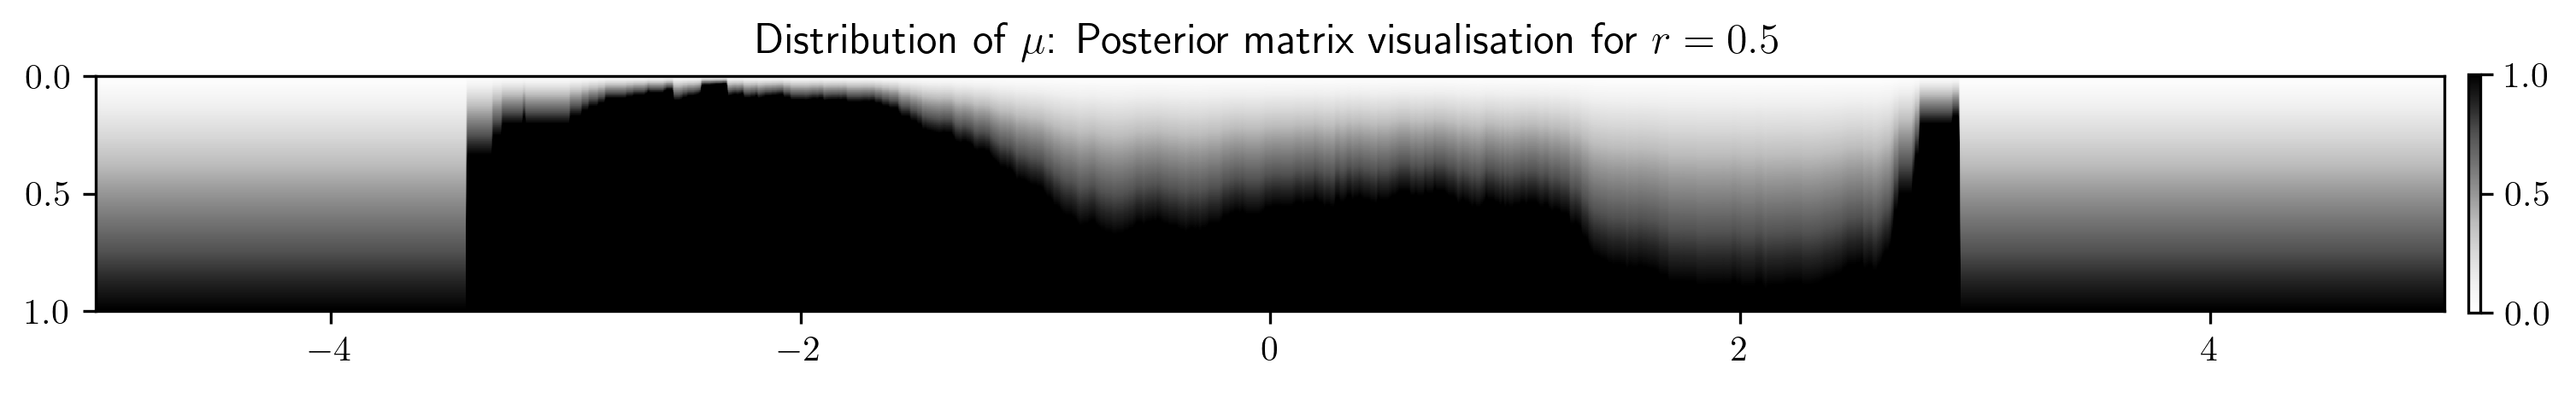

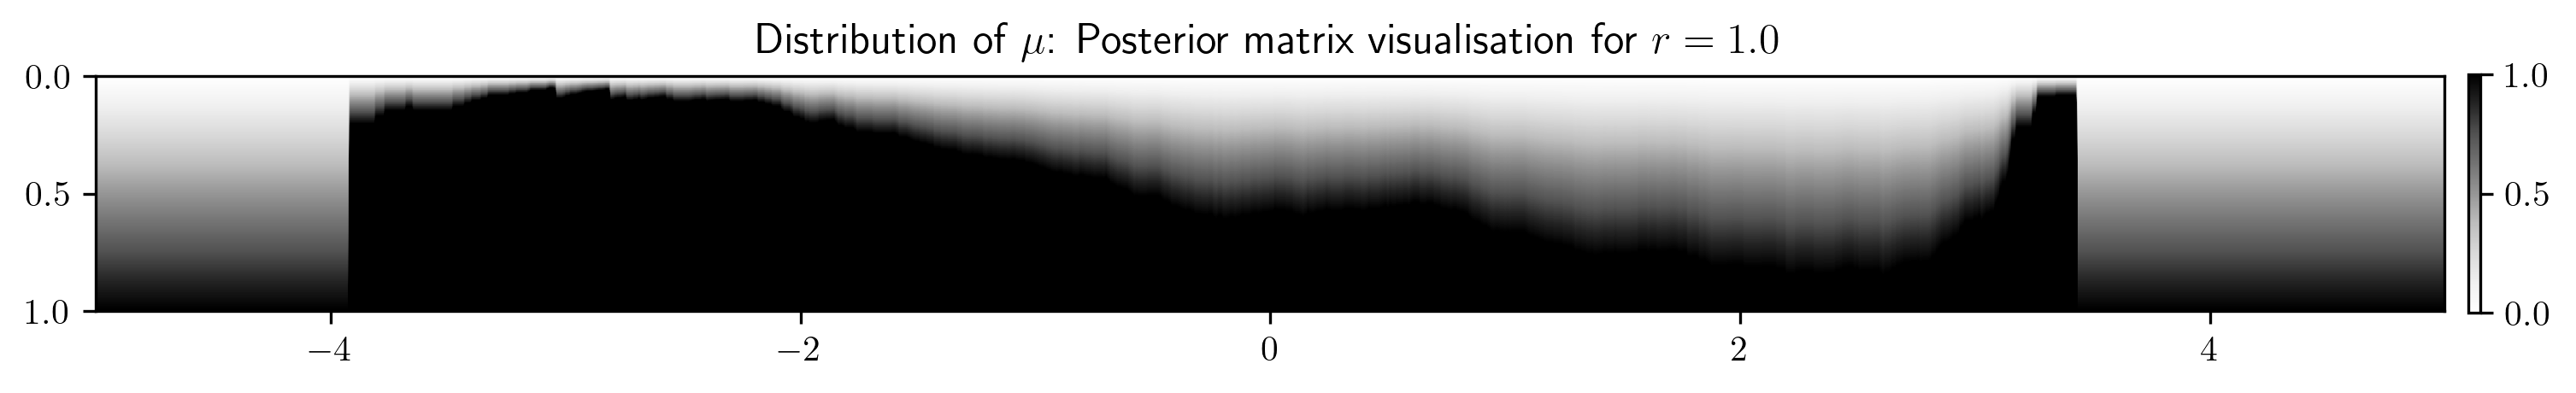

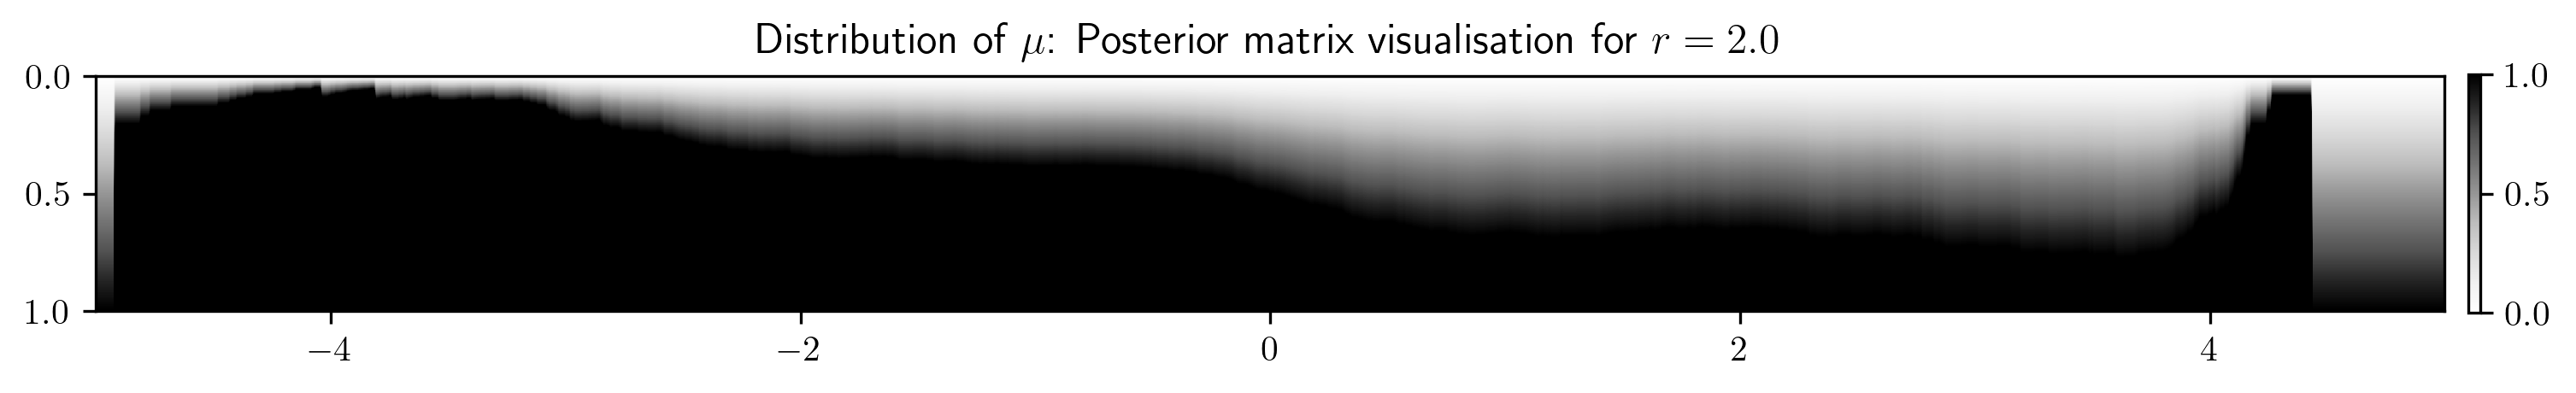

In [11]:
def plot_posterior_matrix(r):
    # this is just the code taken from above for easier repetition with different values for r
    prior_a, prior_b = 1, 1

    # define value range
    vmin, vmax = -5, 5

    # TODO: sample x and mu as described in the exercise
    x = np.linspace(-5, 5, 1001, endpoint=True)
    mu = np.linspace(0, 1, 101, endpoint=True)

    # TODO: use count_points_within_distance to calculate the counts
    cts0 = count_points_within_distance(x, pts[labels==0], r)
    cts1 = count_points_within_distance(x, pts[labels==1], r)

    # TODO: evaluate the posterior to get an image (use broadcasting, no loops needed!)
    # avoid divide-by-zero-errors; in this case just keep the prior
    denom1 = (cts0+cts1)
    denom1[denom1==0] = 1
    denom = cts1/denom1
    denom[denom==0] = 1
    denom[denom1==0] = 1
    posterior = np.tile(mu, (1001,1)).T / np.tile(denom, (101,1))
    # TODO: plot the posterior as an image, specify the correct origin and extent
    plt.imshow(posterior, origin='upper', extent=(-5,5,1,0), cmap='Greys', vmin=0., vmax=1.)
    plt.colorbar(fraction=0.005, pad=0.01)
    plt.title(r'Distribution of $\mu$: Posterior matrix visualisation for $r={:.1f}$'.format(r))
    plt.show()
    
for r in [.01, .1, .5, 1, 2]:
    plot_posterior_matrix(r)

We observe: The lower $r$, the more artefacts we have because of divide-by-zero-errors, where there are no counts. With higher $r$, the posterior distribution of $\mu_x|c_{x,y}$ is smoothed out.

We would opt for a value of $r=0.3$ or at least something in the range $(0.1, 0.3)$ as we see that here for $x\approx2$, we still have a very low posterior probability of $\mu_x$ close to one, which is what would be expected from the distribution of the data.

(e) Bonus
We did not do this bonus exercise.

## 5 The Multivariate Normal
\begin{figure}[H]
\includegraphics[width=\textwidth]{ex5.jpg}
\end{figure}